# NGC 338 (UGC 624)

Галактика из диплома.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N0338'
gtype = 'Sab' #TODO:check
incl = 64.  #adopted  by  Zasov
scale = 0.292 #kpc/arcsec according to ApJ 142 145(31pp) 2011
# scale = 0.311 #kpc/arcsec from NED

data_path = '../../../data/ngc338'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи
* Zasov 2012 https://ui.adsabs.harvard.edu/#abs/2012AstBu..67..362Z/abstract
* https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract (оценки на суммарную массу $\rm{HI}$ и $\rm{H_2}$)
* https://ui.adsabs.harvard.edu/#abs/2011MNRAS.416.2437H/abstract (указание на то, что она взаимодействующая)
* Noordermeer Hulst 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract (фотометрия, декомпозиция)

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+338&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc338 width=1000 height=350></iframe>')

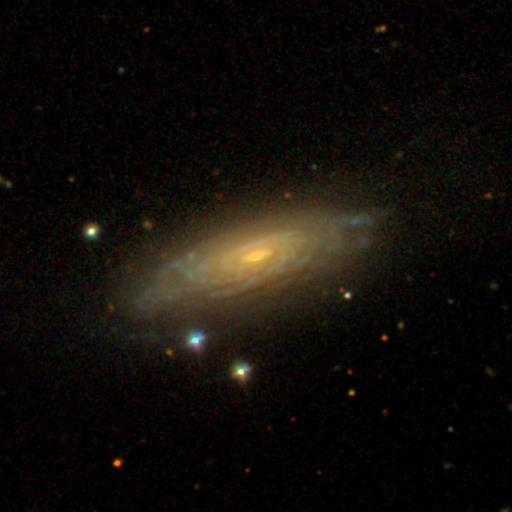

In [9]:
#SDSS
Image('ngc338_SDSS.jpeg', width=300)

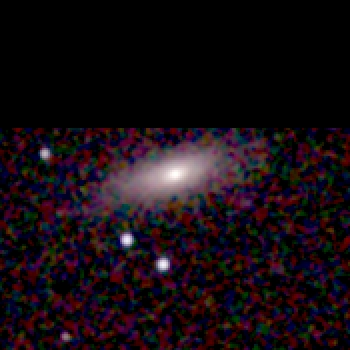

In [10]:
#JHK
Image('ngc338_JHK.jpg', width=300)

### Noordermeer thesis data:

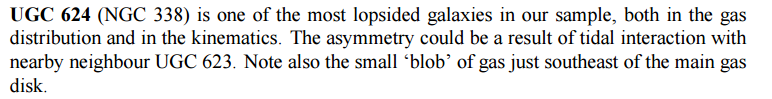

In [11]:
Image('noordermeer_data/n338_cite_p36.png')

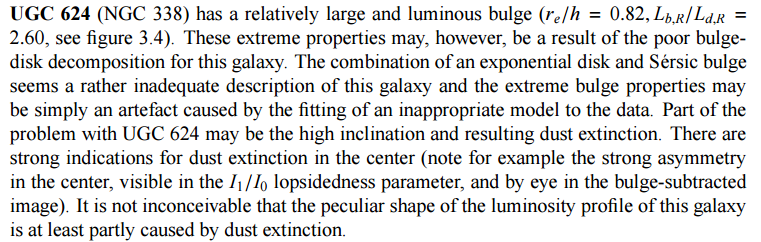

In [12]:
Image('noordermeer_data/n338_cite_p110.png')

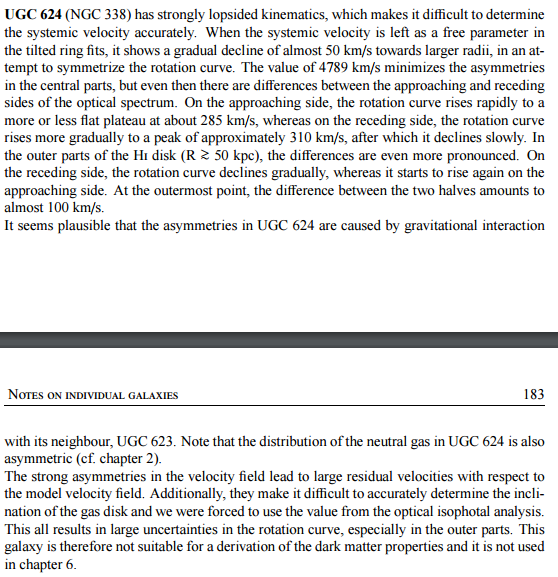

In [13]:
Image('noordermeer_data/n338_cite_pp181_182.png')

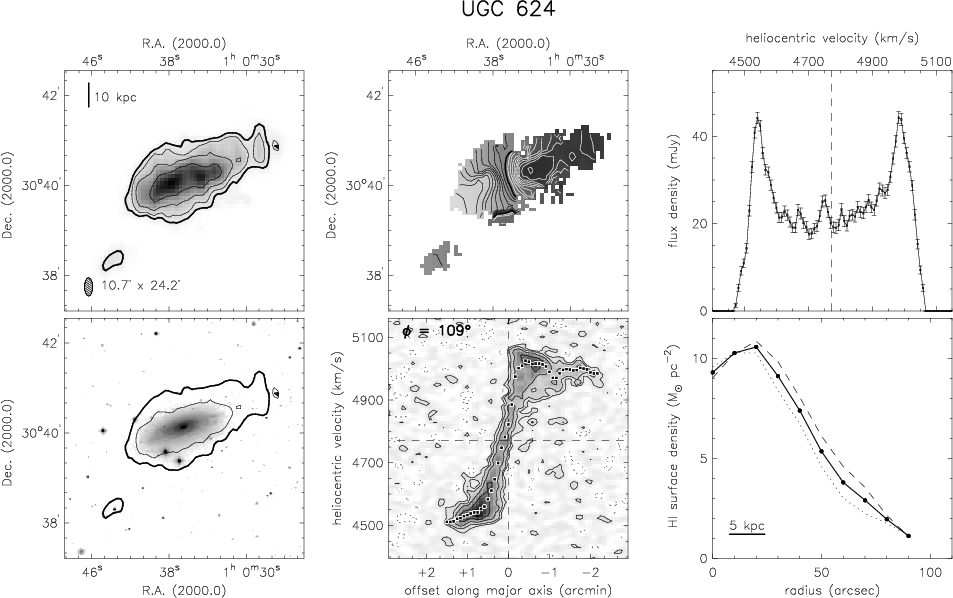

In [14]:
Image('noordermeer_data/HI_data.png')

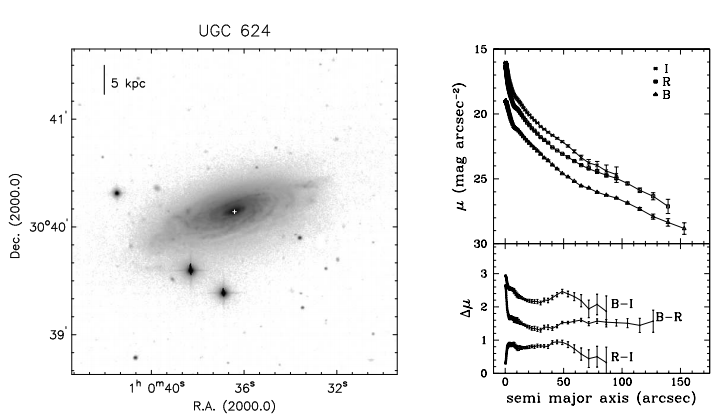

In [15]:
Image('noordermeer_data/n338_photom.png')

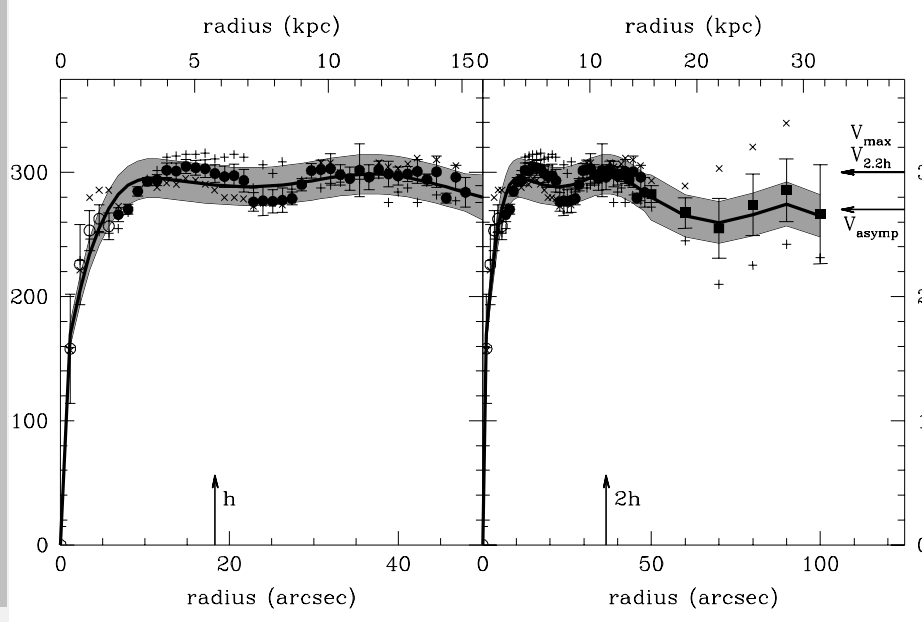

In [16]:
Image('noordermeer_data/n338_rc.png')

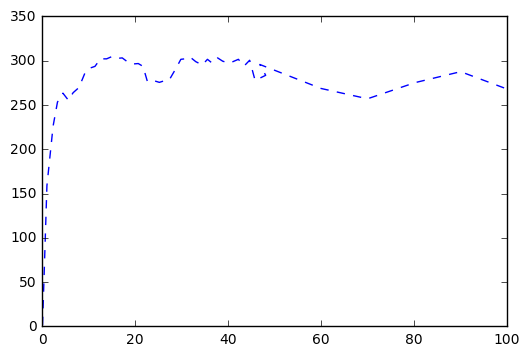

In [17]:
#точки, снятые с предыдущей картинки с помощью WebPlotDigitizer
r_ma, vel_ma = zip(*np.loadtxt("noordermeer_data/n338_rc_noorderm.dat", float, delimiter=','))
plt.plot(r_ma, vel_ma, '--');

TODO: отнести эти данные куда-нибудь

Наконец последнее - все табличные данные из диссертации:

In [18]:
# TODO: добавить

TODO: добавить данные засова

## Кинематические данные по звездам

### Кривая вращения

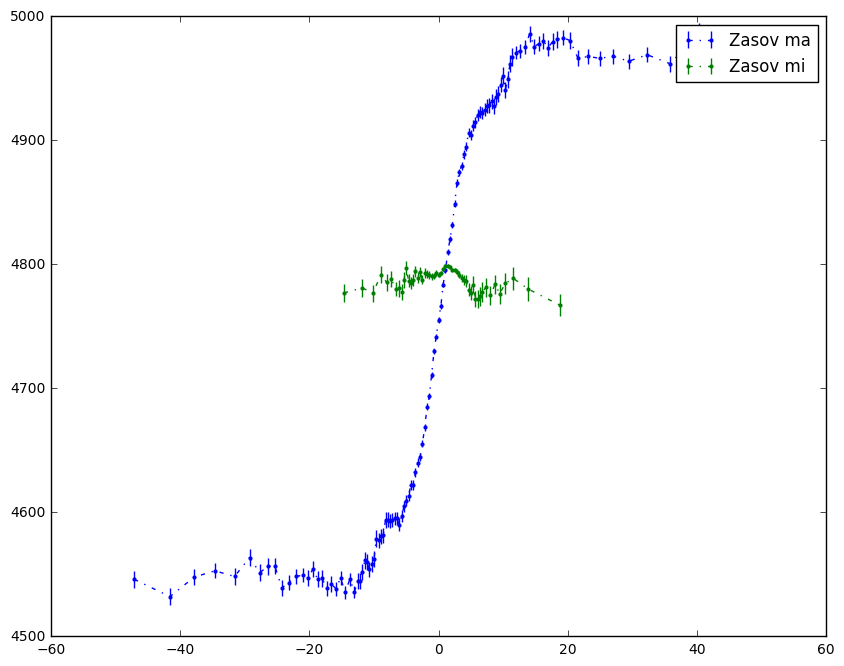

In [19]:
# Данные по звездной кинематике Засова 2012 вдоль большей полуоси, не исправленные за наклон 
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("v_stars_ma.dat", float))

# Данные по звездной кинематике Засова 2012 вдоль малой полуоси, не исправленные за наклон 
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("v_stars_mi.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Zasov ma")
plt.errorbar(r_mi, vel_mi, e_vel_mi, fmt='-.', marker='.', mew=0, label="Zasov mi")
plt.legend();

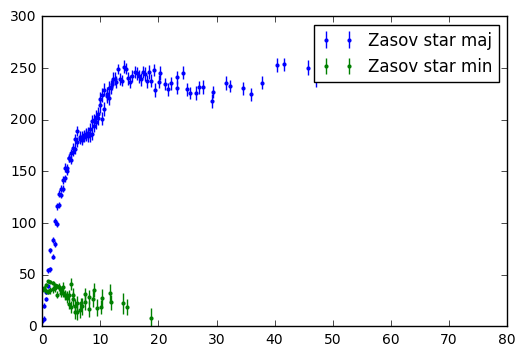

In [20]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

b_vel = 4760

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, b_vel, incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, b_vel, incl)

plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, label = 'Zasov star min', color='green')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend();

TODO: подумать еще раз про малую полуось

TODO: добавить картинку Засова для сравнения

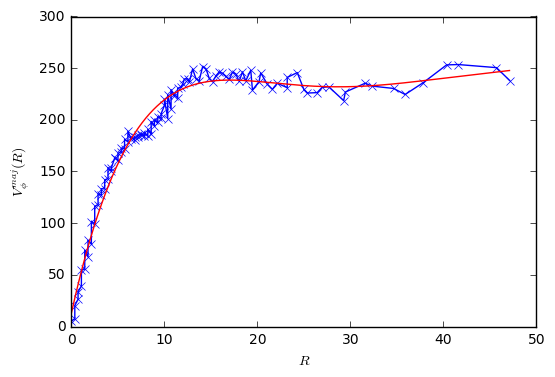

In [21]:
# poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))


plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$');

Wall time: 992 ms


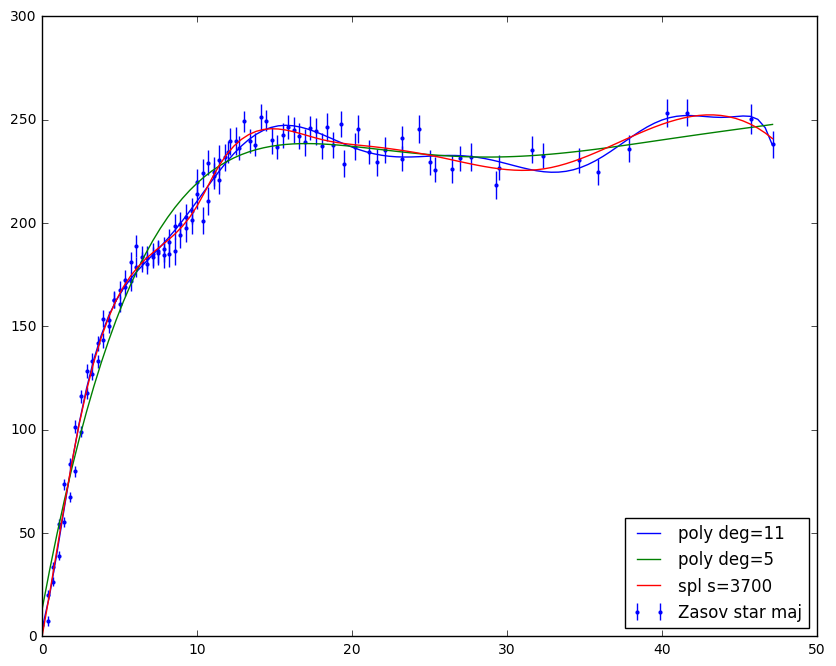

In [22]:
%%time
fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Zasov star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=11))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=11')

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=5')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=3700.)
plt.plot(test_points, spl(test_points), '-', label='spl s=3700')

# spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=4000., w=w(e_vel_b))
# plt.plot(test_points, spl(test_points), '-', label='spl s=4000 w^2')

plt.legend(loc='lower right');

C весами плохо получается, берем обычный достаточно гладкий сплайн.

In [23]:
star_approx = spl

### Дисперсии

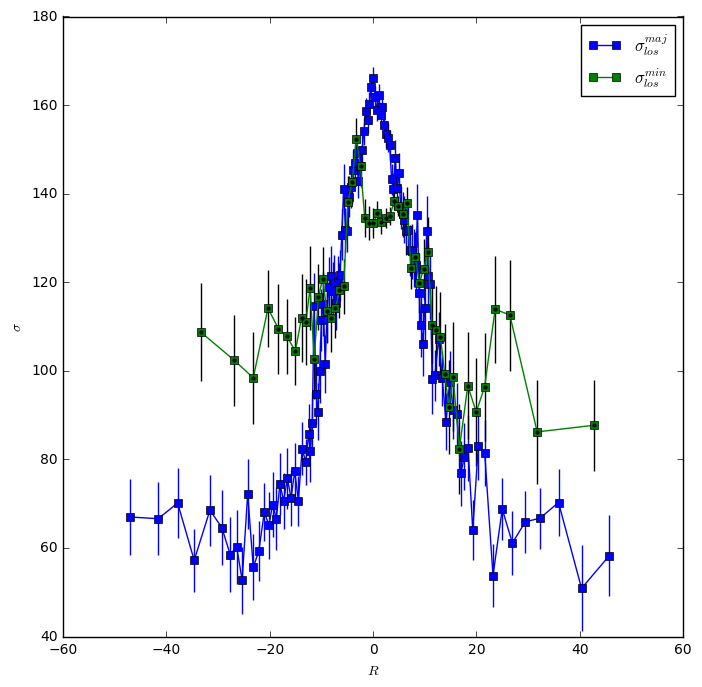

In [24]:
#TODO: свидетельство того, что надо раздвигать

# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_mi_extend = map(correct_min, r_mi)

fig = plt.figure(figsize=[8, 8])
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend();

In [25]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = sorted(zip(r_ma, sig_ma, e_sig_ma))
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
r_sig_ma, sig_ma, e_sig_ma = zip(*sig_maj_data) 

sig_min_data = sorted(zip(r_mi_extend, sig_mi, e_sig_mi))
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
r_sig_mi, sig_mi, e_sig_mi = zip(*sig_min_data) 

In [26]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=3000.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=6000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [27]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

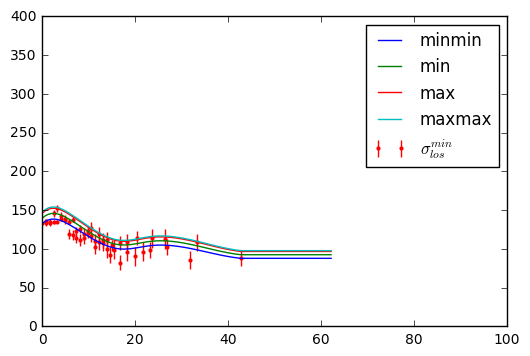

In [28]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

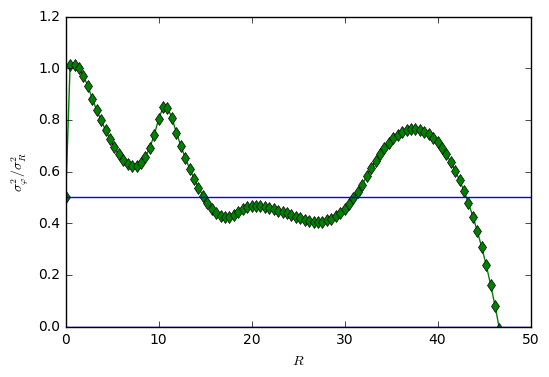

In [29]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

По большой:

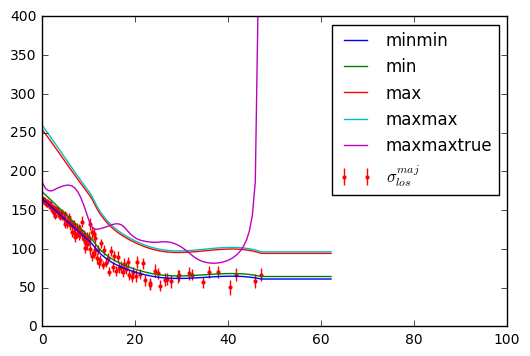

In [30]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Сравним major vs minor оценки:

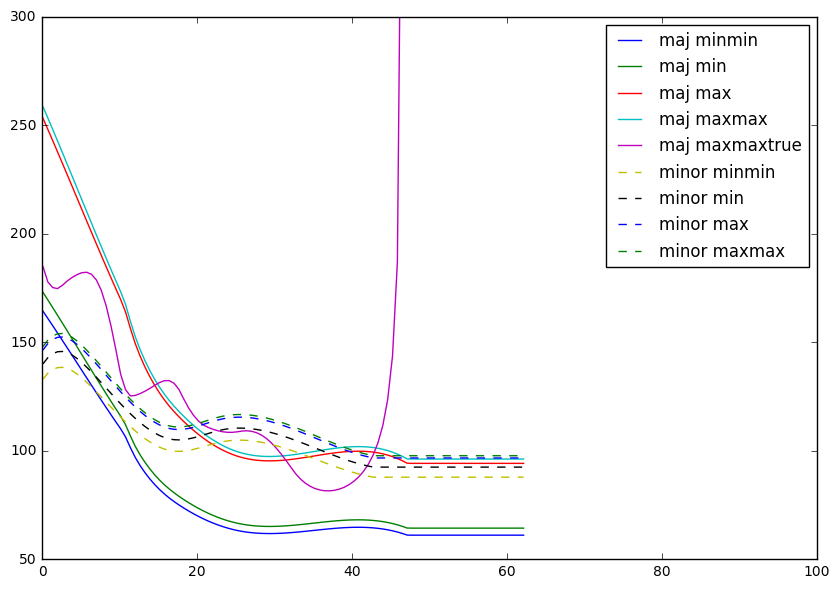

In [31]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,300)
plt.xlim(0,100);

Видно, что оценки из разных осей не согласуются друг с другом.

## Данные по газу

### Кривая вращения

Газовая кривая, нужна для эпициклического приближения:

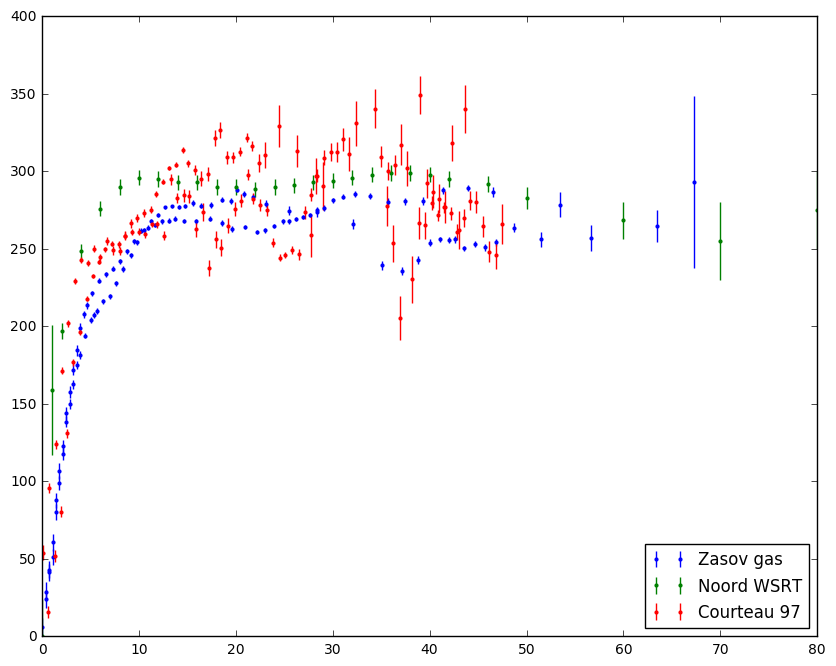

In [32]:
# Данные по кинематике газа Засова 2012 вдоль большой полуоси, не исправленные за наклон (они же Катков)
zasov_raw_data = np.loadtxt("v_gas_ma.dat", float)
r_g, vel_g, e_vel_g = zip(*zasov_raw_data)

# Данные по кинематике газа Noordermeer 2007 (исправлено за наклон)
wsrt_raw_data = np.loadtxt("v_gas_WSRT.dat", float)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*wsrt_raw_data)

# Данные по кинематике газа Courteau 97 (не исправлено за наклон)
court_raw_data = np.loadtxt("v_gas_Court.dat", float)
r_court, vel_court, e_vel_court = zip(*court_raw_data)


r_g_b, vel_g_b, e_vel_g_b = correct_rotation_curve(r_g, vel_g, e_vel_g,  0.0, b_vel, incl)
r_c_b, vel_c_b, e_vel_c_b = correct_rotation_curve(r_court, vel_court, e_vel_court,  0.0, 0.0, incl)


fig = plt.figure(figsize=[10,8])
plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'Noord WSRT')
plt.errorbar(r_c_b, vel_c_b, yerr=e_vel_c_b, fmt='.', marker='.', mew=0, label = 'Courteau 97')
plt.xlim(0, 80.0)
plt.ylim(0)
plt.legend(loc='lower right');

В целом достаточно неплохо согласуются, если Courteau усреднить

TODO: посмотреть, что именно за газ

Приближения: (пока будем приближать Засова)

TODO: сделать все точки вместе, больше данных чтоб

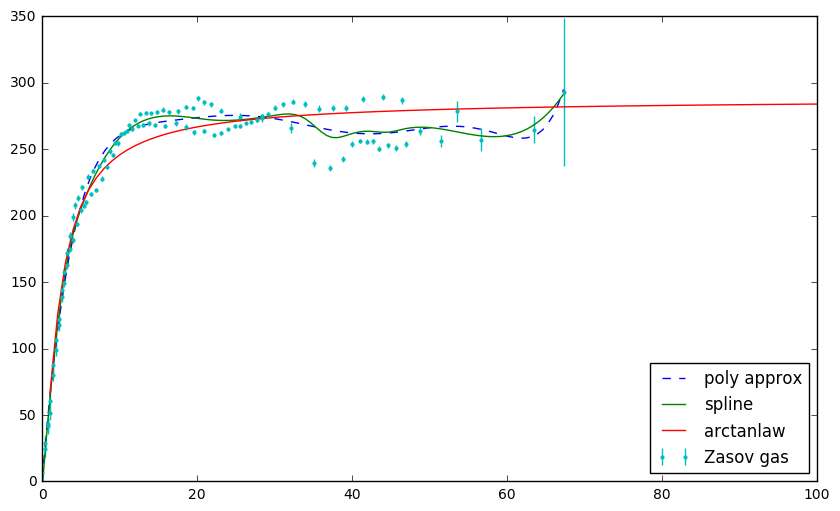

In [33]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_g_b, vel_g_b, deg=7))
test_points = np.linspace(min(r_g_b), max(r_g_b), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_g_b, vel_g_b, k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

def arctanlaw(x,m,c,d):
    return c*np.arctan(x/m) + d
#     return c*np.power(x,m) + d

coeff, _ = curve_fit(arctanlaw, r_g_b[:-1], vel_g_b[:-1])
m, c, d = coeff[0], coeff[1], coeff[2]
plt.plot(np.linspace(1., 100., 100), map(lambda l: arctanlaw(l, m,c,d), np.linspace(1., 100., 100)), '-', label='arctanlaw')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

plt.ylim(0, 350)
plt.legend(loc='lower right');

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

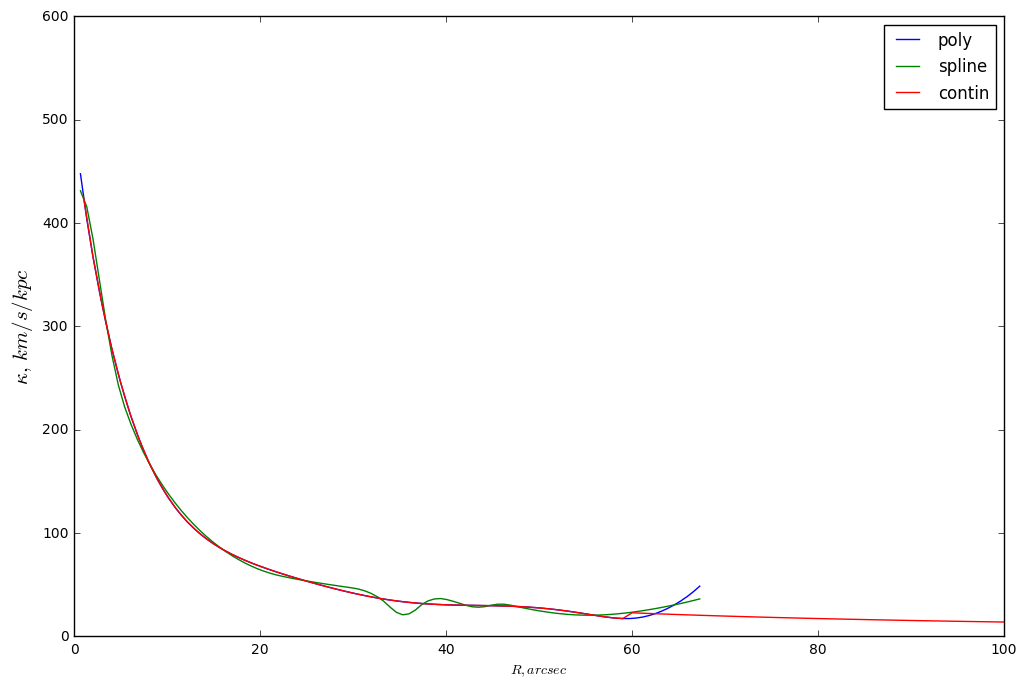

In [34]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')

def epicyclicFreq_real_(spl_gas, x, scale):
    '''продливаем дальше без производной на плато'''
    if x < 60.:
        return epicyclicFreq_real(spl_gas, x, scale)
    else:
        return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
#     TODO: check scale multiplication
    
plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 600)
plt.legend();

### Поверхностная плотность газа

Плотность HI:

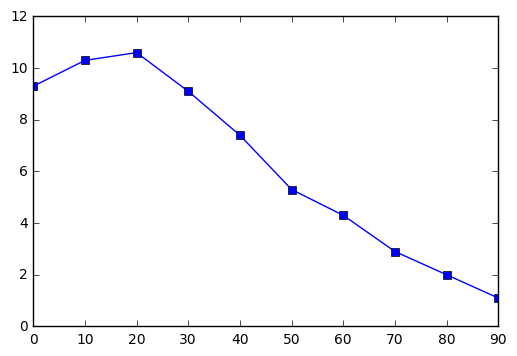

In [35]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-');

Газа оооочень много.

В работе https://ui.adsabs.harvard.edu/#abs/1998AJ....115..405L/abstract есть центральаня яркость в $CO$ (5.16) и при пересчете (если он правильный) получается примерно 16.5 в центре, что вполне нормально.

Похоже это все же неправильно. Там есть посчитанное количество $H_2$ - $6.2\times10^9 M_{sun}$ и формула там была $M(H2) = 2.96\times 10^5 I_{CO} D_{Mpc}^2$. И тогда центральное значение должно быть по формуле $M_d = 2\pi h^2 \Sigma(0)$ равно:

In [36]:
6.2*1e9/(2*math.pi*12.9**2 * (scale * 1000.)**2), 6.2*1e9/(2*math.pi*18.3**2 * (scale * 1000.)**2)

(69.54512589445105, 34.55762907251813)

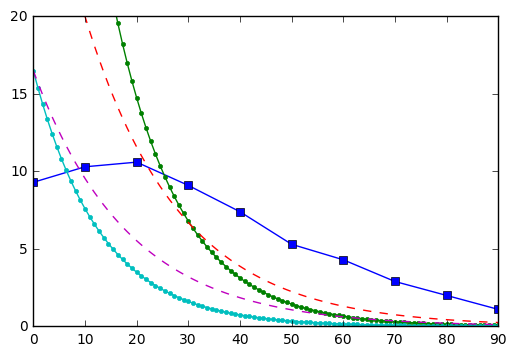

In [37]:
plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(np.linspace(0, 90, 100), [69.54*np.exp(-l/12.9) for l in np.linspace(0, 90, 100)], '.-')
plt.plot(np.linspace(0, 90, 100), [34.55*np.exp(-l/18.3) for l in np.linspace(0, 90, 100)], '--')
plt.plot(np.linspace(0, 90, 100), [16.5*np.exp(-l/12.9) for l in np.linspace(0, 90, 100)], '.-')
plt.plot(np.linspace(0, 90, 100), [16.5*np.exp(-l/18.3) for l in np.linspace(0, 90, 100)], '--')
plt.ylim(0, 20);

При этом масса атомарного водорода там в два раза больше $HI$ - $12.34\times10^9 M_{sun}$ (у Ноордермеера 14.42). Проверим, сколько у нас водорода:

In [38]:
import scipy.integrate as integrate
import scipy.interpolate

tmp_ = scipy.interpolate.interp1d(r_g_dens, gas_dens)

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), r_g_dens[0], r_g_dens[-1])
print (scale * 1000.)**2 * result[0]/1e9
print (0.311 * 1000.)**2 * result[0]/1e9 #более подходящий масштаб

9.82081483752
11.1404465179


C:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


У нас получается меньше, чем у Ноордермеера, но он похоже врет - у него среднее $\Sigma$ внутри $92^{''}$ равно 4.3, и вот что получится если мы пересчитаем это обратно в массу через площадь:

In [39]:
4.3/1e9 * np.pi*(92.*scale*1000)**2

9.748991368141876

Что ближе к нашей величине, чем к его. Чтобы получить его величины, нужно иметь масштаб 0.355, что слишком много. Возможно там еще дальше есть водород, которого нет в профиле.

## Данные по фотометрии

В дипломе написана неправда - в диссератции есть эта галактика (не знаю, почему я писал только о статье с Hulst), причем аж три полосы: I, R, B.

In [40]:
all_photometry = []

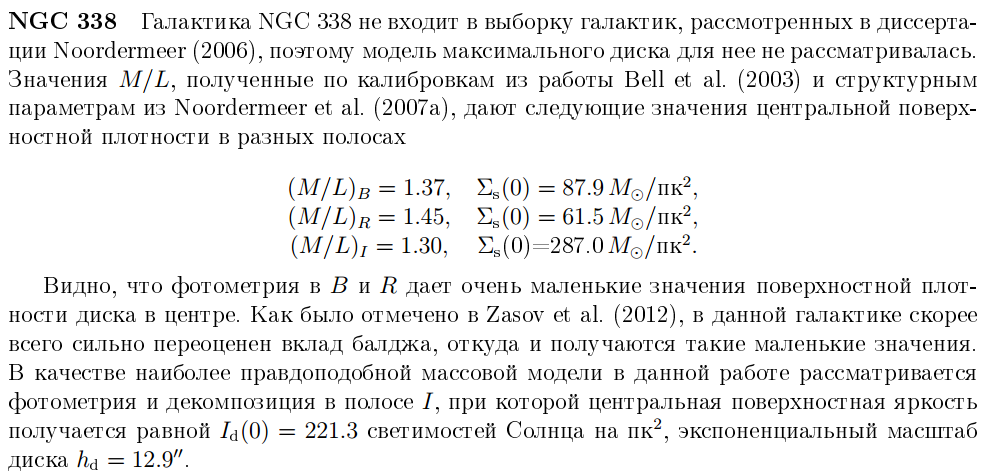

In [41]:
all_photometry = []
Image('diplom_cite_p34.png')

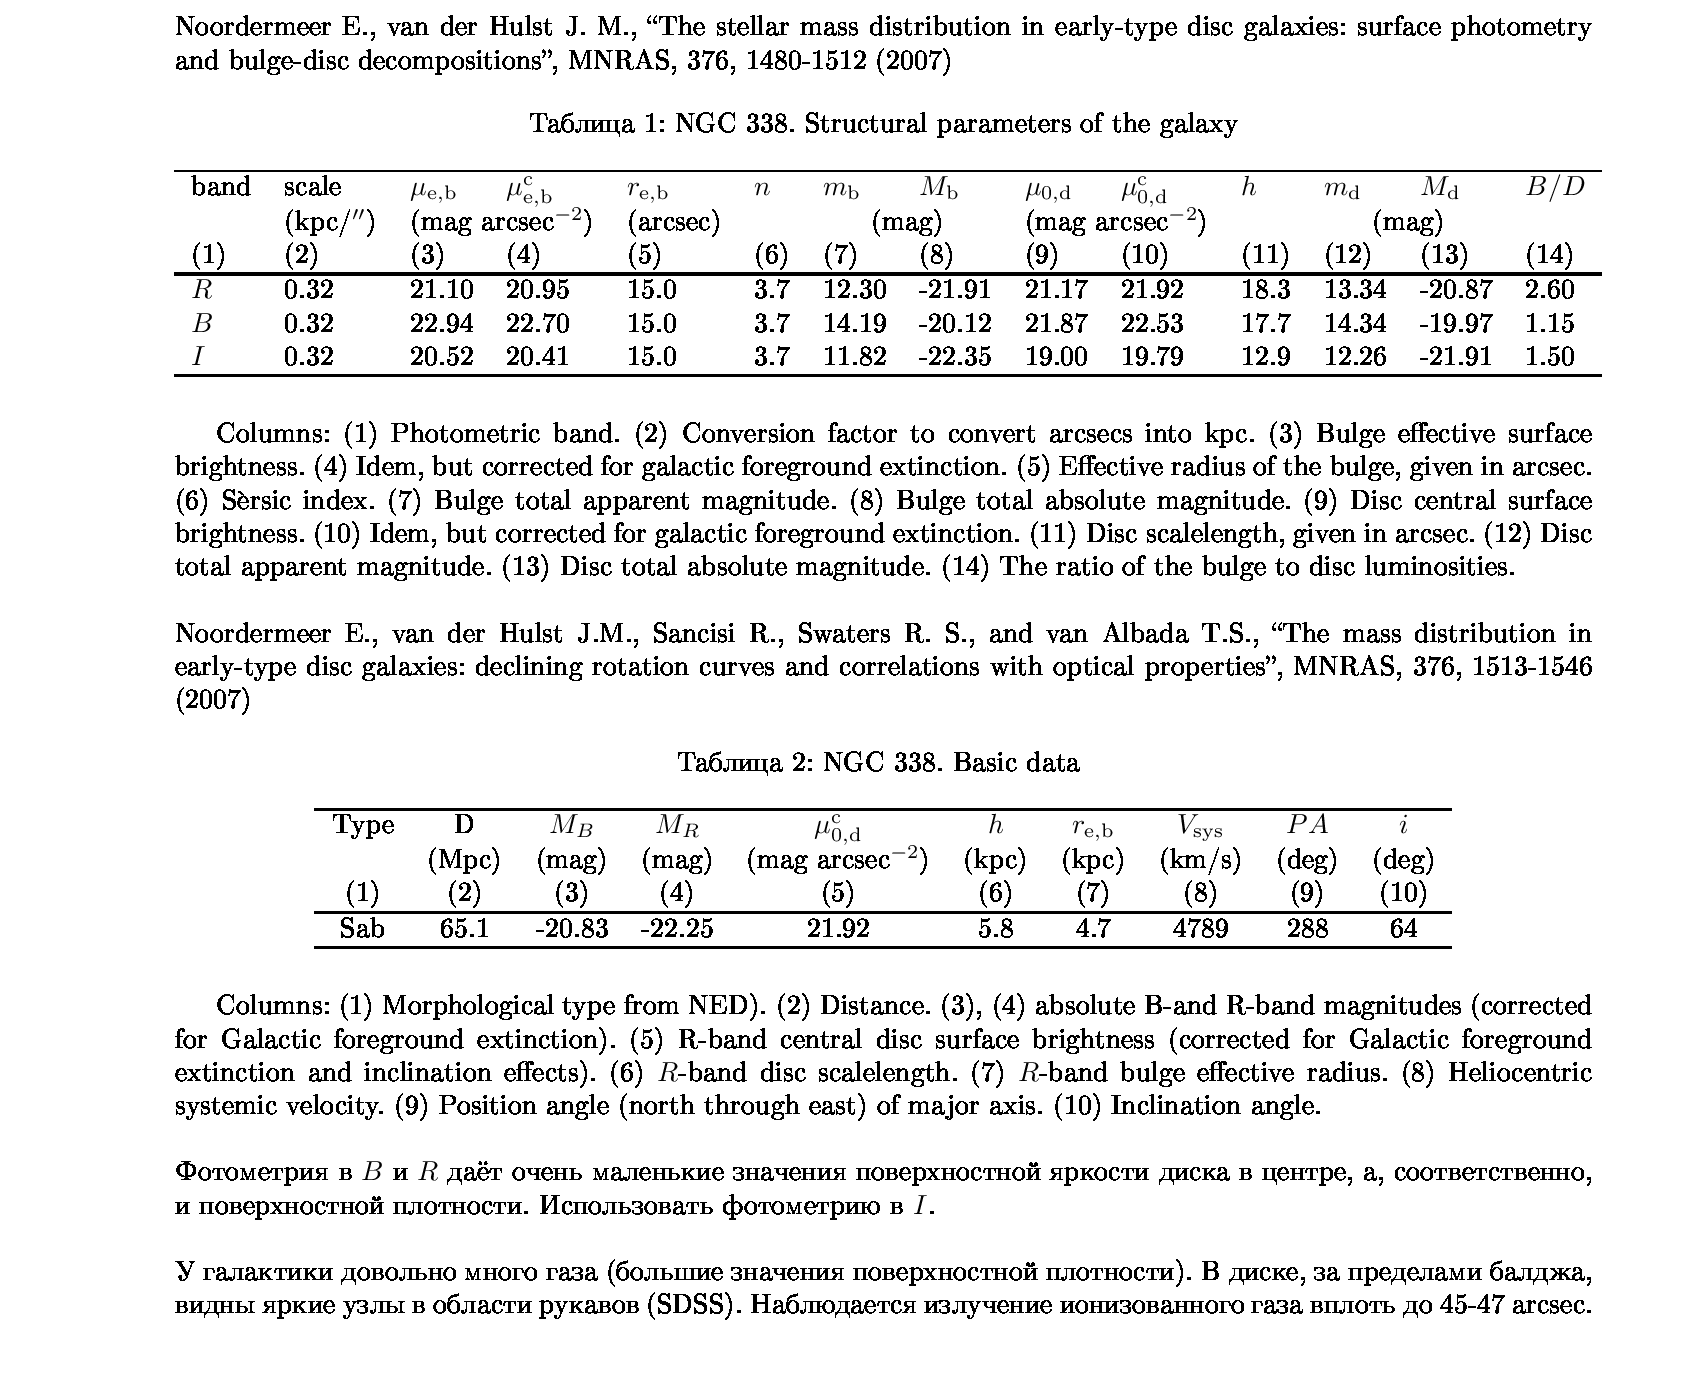

In [42]:
from wand.image import Image as WImage
img = WImage(filename='ngc338.pdf', resolution=200)
img[:, 200:1600]

In [43]:
M_R = -20.87 #13.34 в дипломе были относительные, что неверно
M_B = -19.97 #14.34

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [44]:
print 'I : {:2.2f}; B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'I', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'B', 'B-R'), 
                                                      bell_mass_to_light(M_B-M_R, 'R', 'B-R'))

I : 1.15; B : 1.06; R: 1.24.


Брать надо скорректированные (они face-on и исправлены за поглощение):

In [45]:
# I-band
r_eff_I = 15.0
mu_eff_I = 20.52
n_I = 3.7
mu0d_I = 19.0
h_disc_I = 12.9

# I-band
mu_eff_Ic = 20.41
mu0d_Ic = 19.79

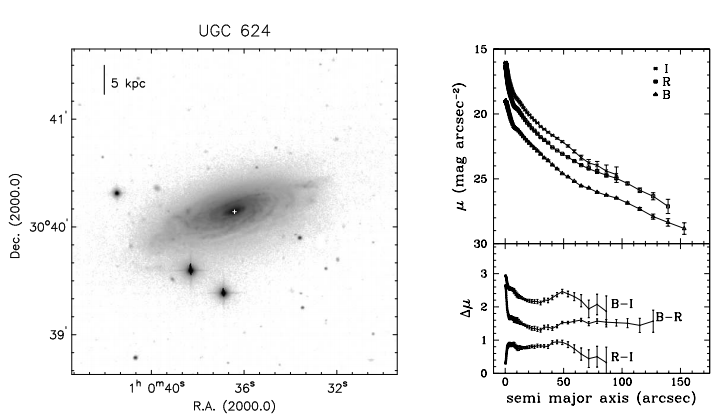

In [46]:
Image('noordermeer_data/n338_photom.png')

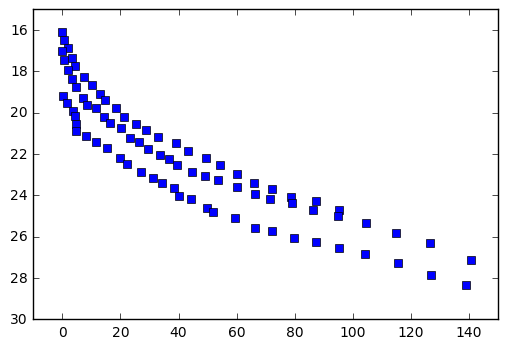

In [47]:
r_phot, mu_phot = zip(*np.loadtxt("noordermeer_data/n338_noord_photoIBR_p131.dat", float, delimiter=','))
plt.plot(r_phot, mu_phot, 's')
plt.xlim(-10, 150)
plt.ylim(30, 15);

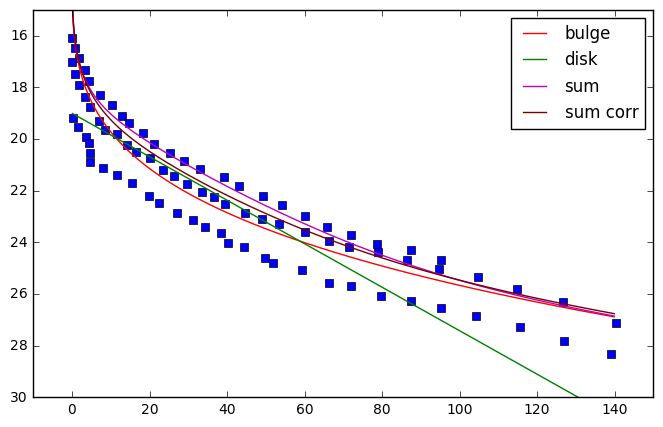

In [48]:
p_ = np.arange(0.1, 140., 0.1)
bulge_I = [mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_]
disc_I = [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]
total_profile_I = total_mu_profile(bulge_I, disc_I)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, bulge_I, '-', label='bulge', color='red')
plt.plot(p_, disc_I, '-', label='disk', color='green')
plt.plot(p_, total_profile_I, '-', label='sum', color='m')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_Ic, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_Ic, h=h_disc_I) for l in p_]), '-', label='sum corr', color='#770000')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

In [49]:
# R-band
r_eff_R = 15.0
mu_eff_R = 21.10
n_R = 3.7
mu0d_R = 21.17
h_disc_R = 18.3

mu_eff_Rc = 20.95
mu0d_Rc = 21.92

In [50]:
# B-band
r_eff_B = 15.0
mu_eff_B = 22.94
n_B = 3.7
mu0d_B = 21.87
h_disc_B = 17.7

mu_eff_Bc = 22.70
mu0d_Bc = 22.53

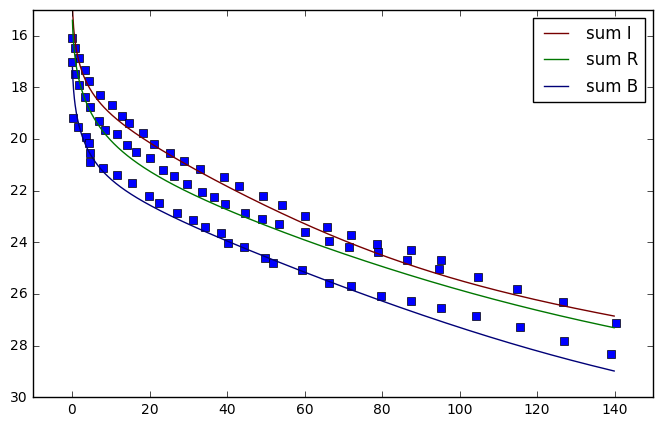

In [51]:
fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_I, r_eff=r_eff_I, n=n_I) for l in p_], 
                              [mu_disc(l, mu0=mu0d_I, h=h_disc_I) for l in p_]), '-', label='sum I', color='#770000')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

Отлично, похоже на правду. Массовые модели:

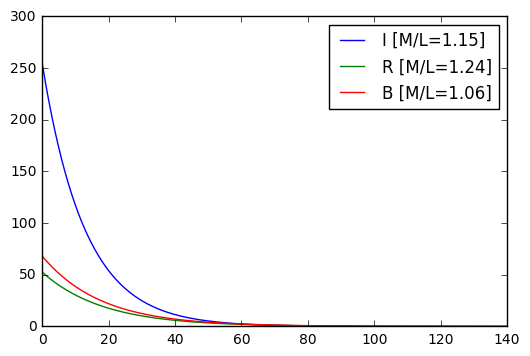

In [52]:
b_r_color = M_B-M_R

M_to_L_I = bell_mass_to_light(b_r_color, 'I', 'B-R')
surf_I = [surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I') for l in p_]
plt.plot(p_, surf_I, '-', label='I [M/L={:2.2f}]'.format(M_to_L_I))

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

plt.legend();

Чуть поменьше, чем в дипломе, потому что взяли скорректированные за поглощение значения. 

TODO: почему стало меньше - аккуратнее

In [53]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_B, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B')))
all_photometry.append(('Noorder I', r_eff_I, mu_eff_Ic, n_I, mu0d_Ic, h_disc_I, M_to_L_I, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), M_to_L=M_to_L_I, band='I')))

 К сожалению, больше фотометрии найти не удалось. Только в http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1996ApJS..103..363C&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf есть наметки в 'r' полосе:

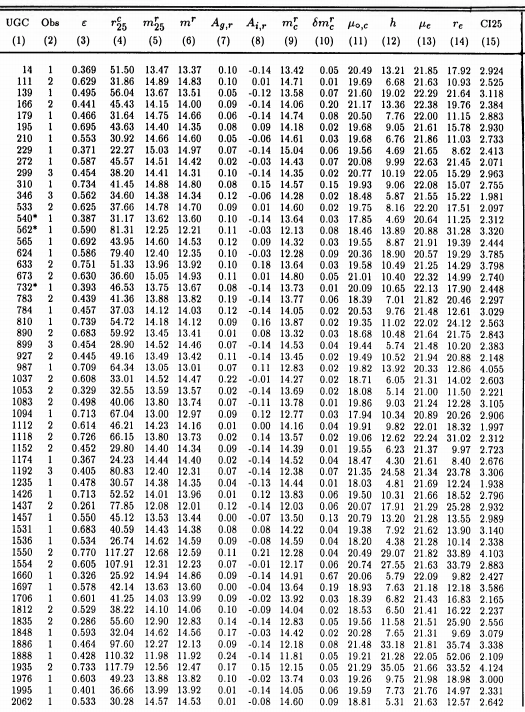

In [54]:
Image('624_decomp.png')

In [55]:
show_all_photometry_table(all_photometry, scale)

+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+
|      | Name      |   r_eff |   mu_eff |    n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------|
| 0.00 | Noorder R |   15.00 |    20.95 | 3.70 |   21.92 |    18.30 |  1.24 | 9.43E+09.   |        53 |
| 1.00 | Noorder B |   15.00 |    22.70 | 3.70 |   22.53 |    17.70 |  1.06 | 1.14E+10.   |        68 |
| 2.00 | Noorder I |   15.00 |    20.41 | 3.70 |   19.79 |    12.90 |  1.15 | 2.27E+10.   |       255 |
+------+-----------+---------+----------+------+---------+----------+-------+-------------+-----------+


### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

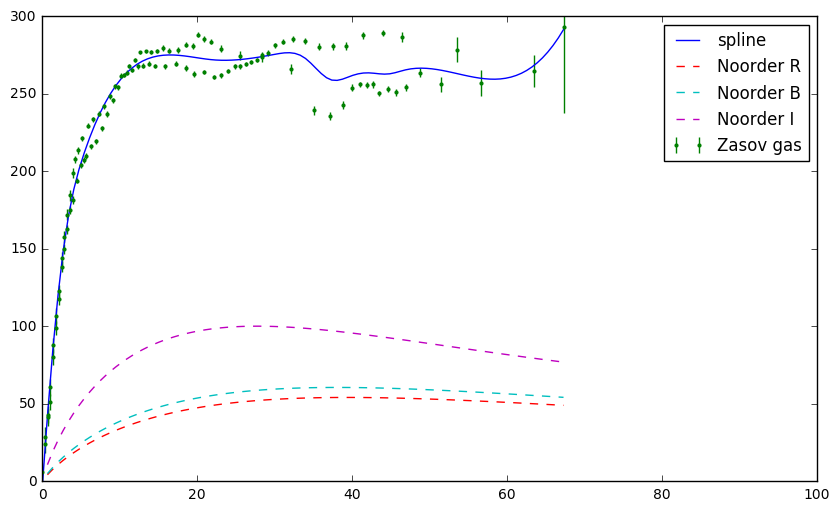

In [56]:
fig = plt.figure(figsize=[10,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 100)
plt.legend(loc='best');

Очевидно они все достаточно плохи (я бы сказал, что $I$) чуть получше остальных, отринуть никакую нельзя.

## Зоны звездообразования

Вроде бы есть в XUV изображение в одной из статей. Но в целом можно рассудить так - SDSS изображение имеет радиус 200 секунд и там видно примерно до 50" (на меньшей картинке было лучше видно). 

sdss http://skyserver.sdss.org/dr12/en/tools/explore/summary.aspx?ra=015.151708&dec=+30.668919

dr9 http://cas.sdss.org/dr9/en/tools/explore/obj.asp?id=1237680286530732043, масштаб 0.39612 "/pix => размер картинки 200 секунд

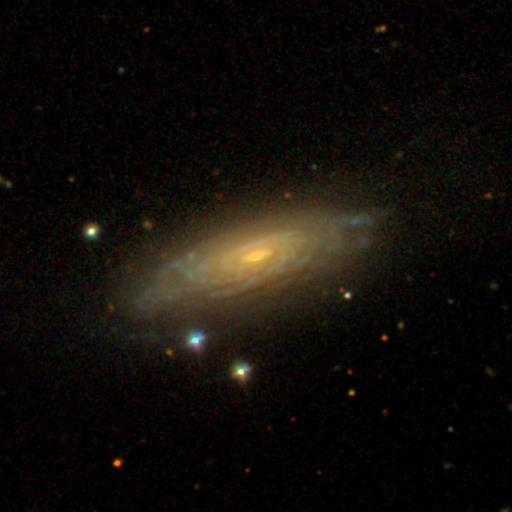

In [57]:
Image('ngc338_SDSS.jpeg', width=400)

(0, 200)

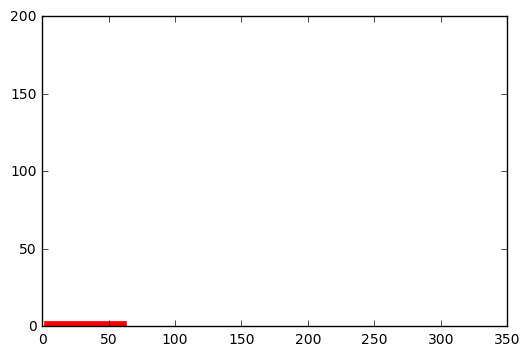

In [58]:
def plot_SF(ax):
    ax.plot([5., 60.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

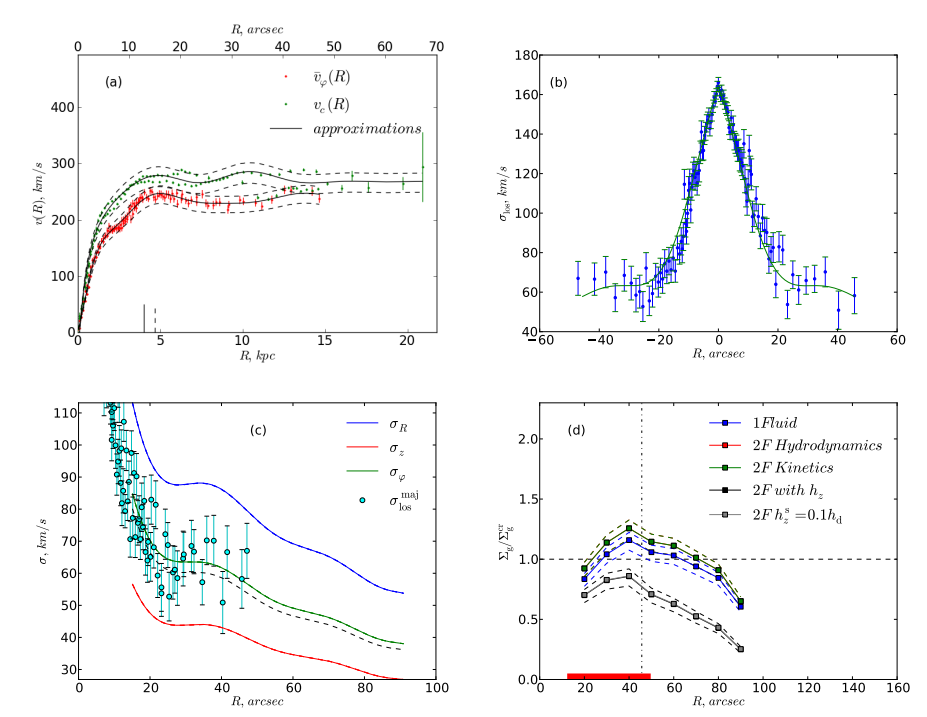

In [59]:
Image('diplom_results.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [60]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

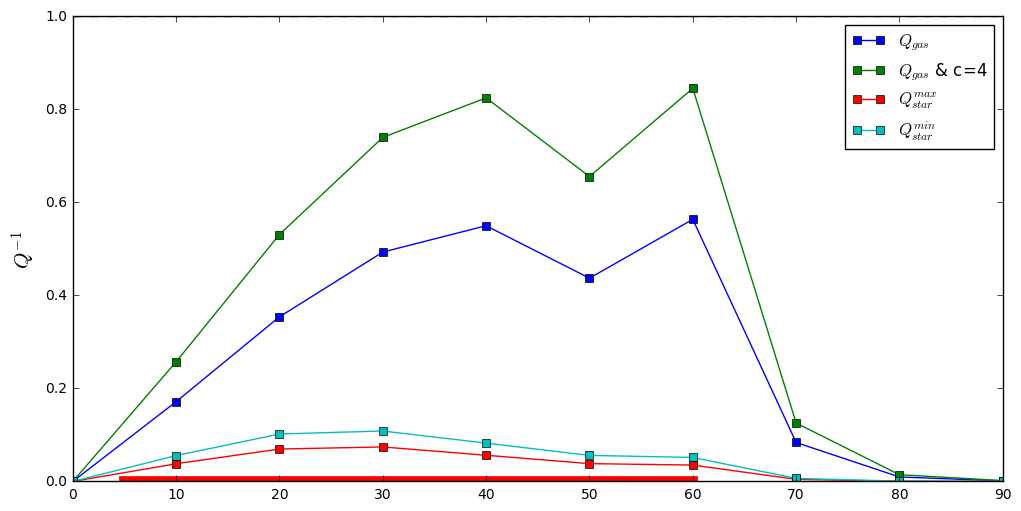

In [61]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(gas_approx, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens),
                        [surf_density(l_, M_to_L_R, 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

Почему-то меньше чем в дипломе, даже с учетом 1.6 (вот c=4 похоже).

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Так и должно быть.

Попробуем с продолженной эпицикл. частотой:

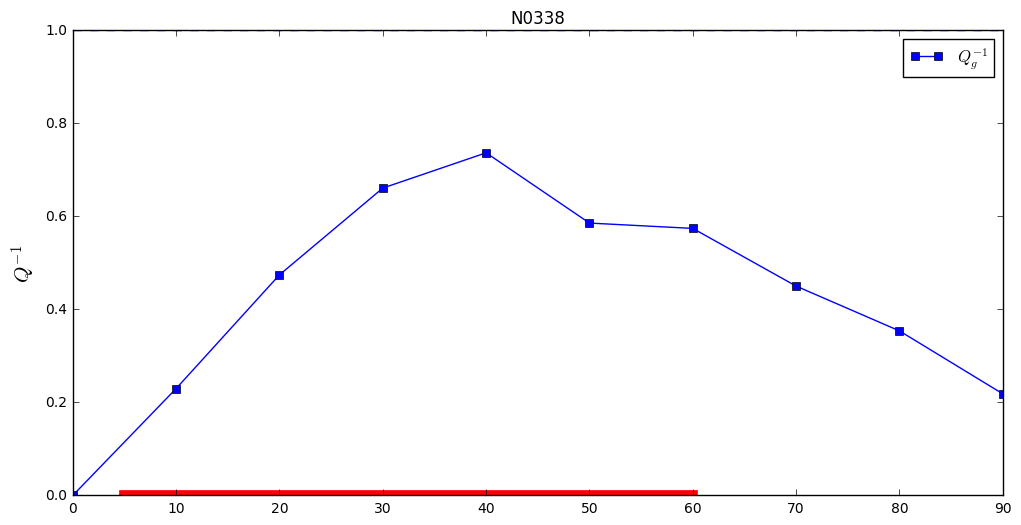

In [62]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real_(gas_approx, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{g}^{-1}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name);
# plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight')

Видно, что падение стало более плавным.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

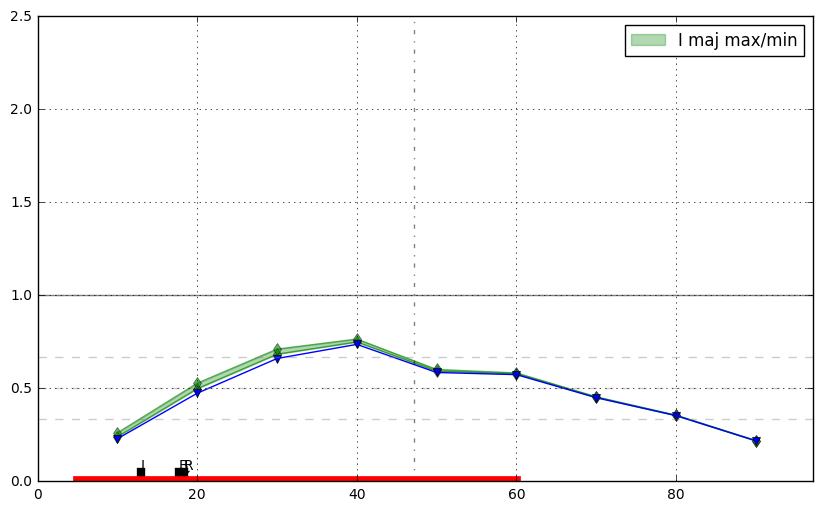

In [63]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

# Конец

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


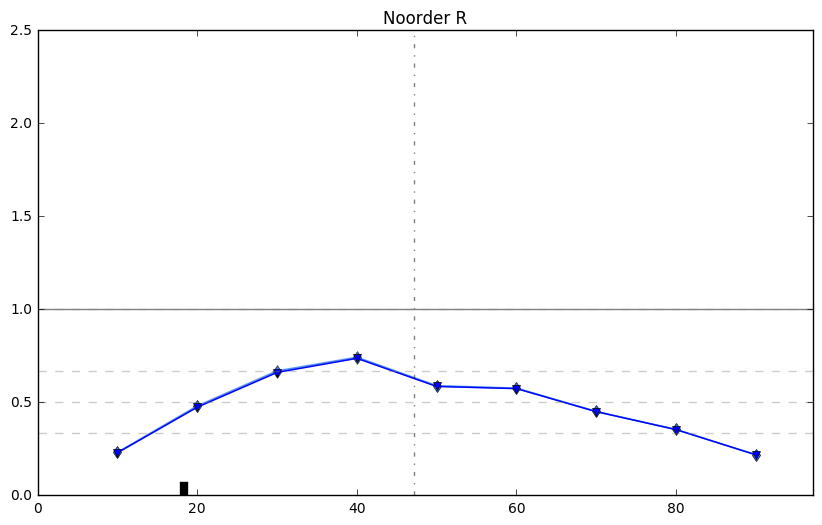

In [65]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real_, gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [66]:
# anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=2)

In [67]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

Noorder R      : M/L was 1.24 and for max it equal 20.91, for submax equal 10.42
Noorder B      : M/L was 1.06 and for max it equal 14.02, for submax equal 6.99
Noorder I      : M/L was 1.15 and for max it equal 6.23, for submax equal 3.10


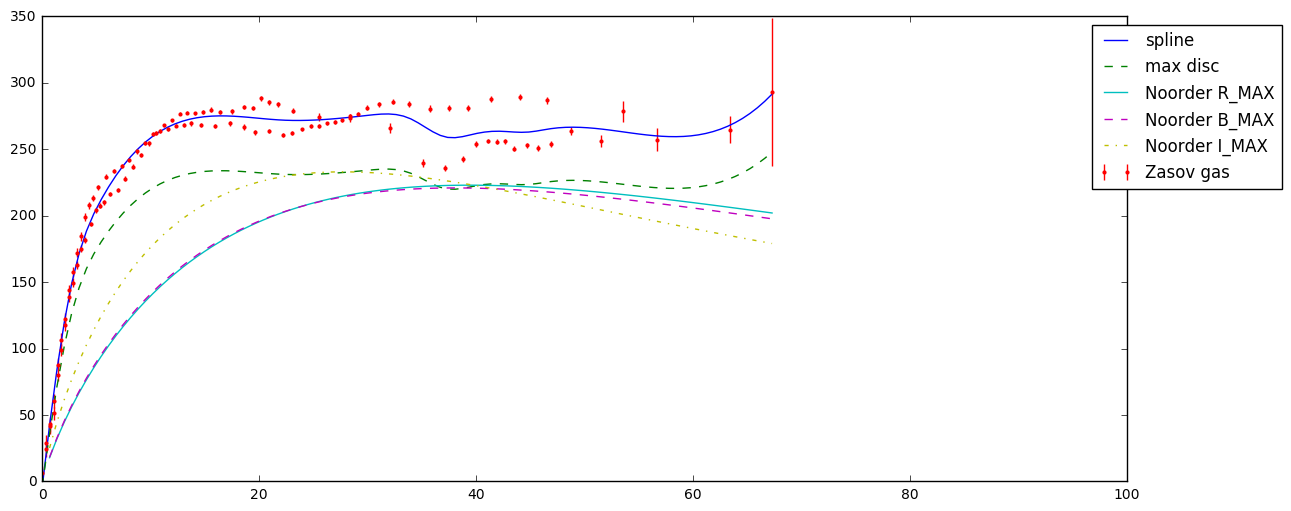

In [68]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
# plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
# plt.plot(r, vel, '.', label = 'Noord thesis')

plt.errorbar(r_g_b, vel_g_b, yerr=e_vel_g_b, fmt='.', marker='.', mew=0, label = 'Zasov gas')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.15, 1.0));

Только $I$ выглядит не превыщающим, для $B$ можно взять субмаксимальный.

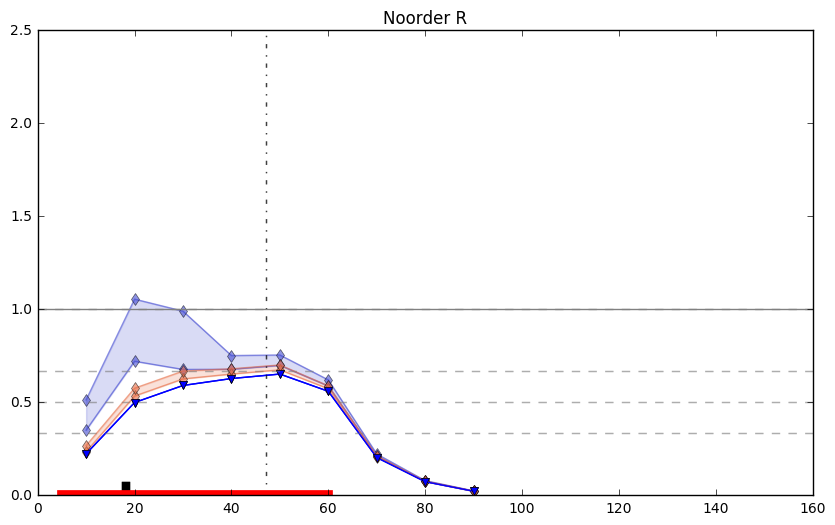

In [69]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:],
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], 
              epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    ax.set_xlim(0., 160.)
    plot_SF(ax)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [70]:
# anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [71]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Оценки с молекулярным диском

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


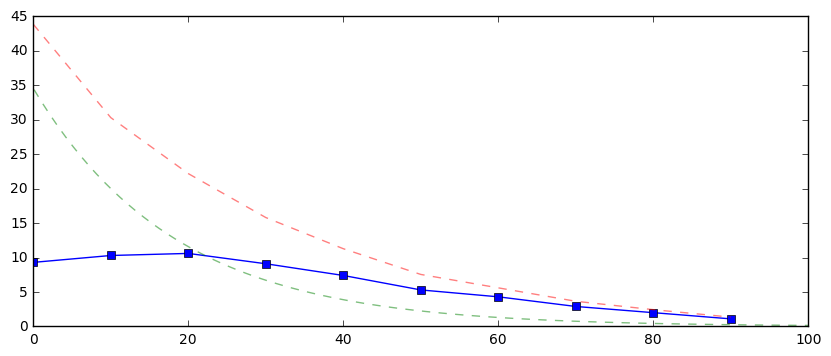

In [78]:
fig = plt.figure(figsize=[10, 4])

# def y_interp_(r, h):
#     return 16.5*np.exp(-r/h)

# change to other molecular model
def y_interp_(r, h):
    return 6.2*1e9/(2*math.pi*h**2 * (scale * 1000.)**2) * np.exp(-r/h)

points = np.linspace(0.1, 100., 100.)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, y_interp_(points, 18.3),  '--', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0], 18.3) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5);

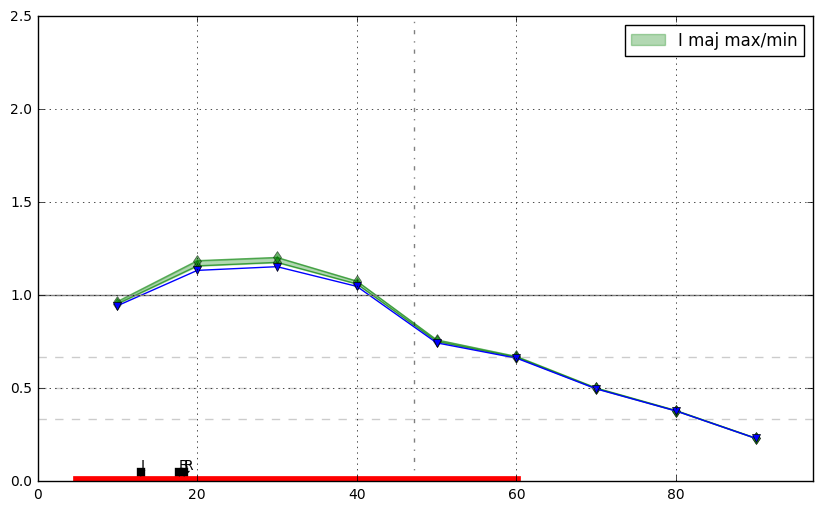

In [79]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], 12.9) + l[1]) for l in zip(r_g_dens, gas_dens)])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_I, h=h_disc_I), M_to_L_I, 'I'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Поднялось повыше в центре.
Для $I$ и $R$:

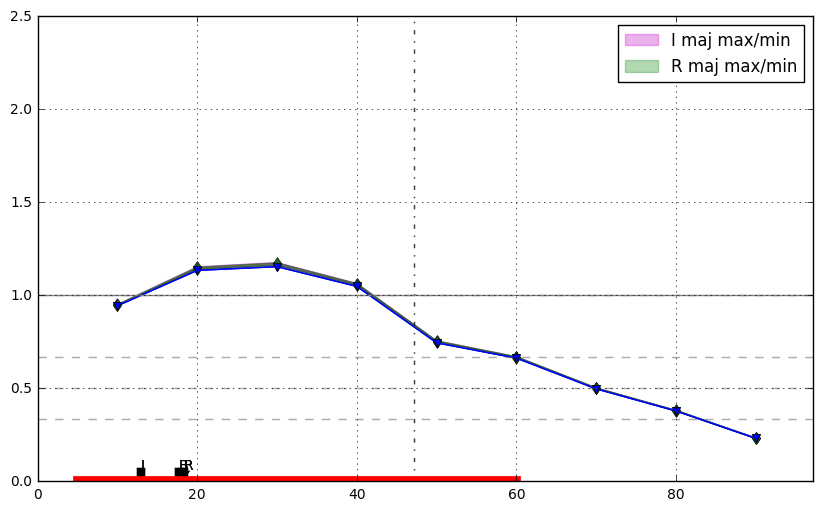

In [80]:
fig = plt.figure(figsize=[10, 6])

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='I maj max/min')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real_, 
              gas_approx=gas_approx, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), M_to_L_R, 'R'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

И оценки с максимальным диском:

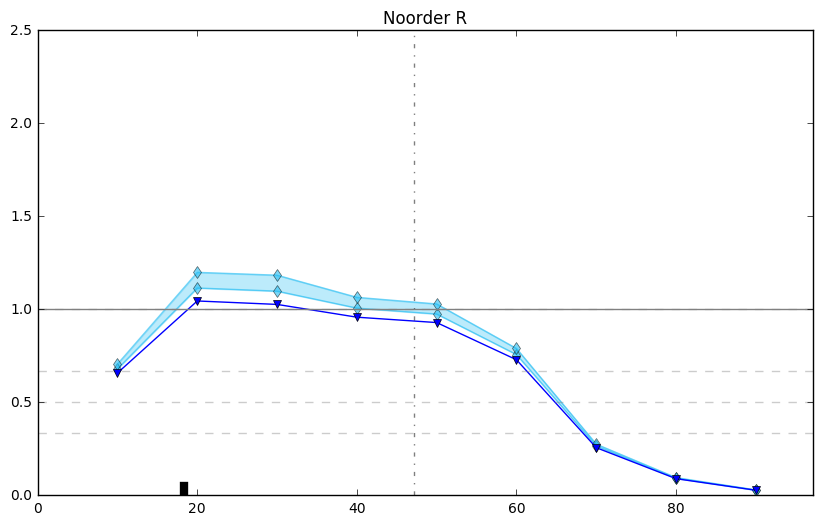

In [81]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
       
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [82]:
# anim.save('..\\..\pics\\'+name+'_molec_MAX.gif', writer='imagemagick', fps=1)

In [83]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Картинка 

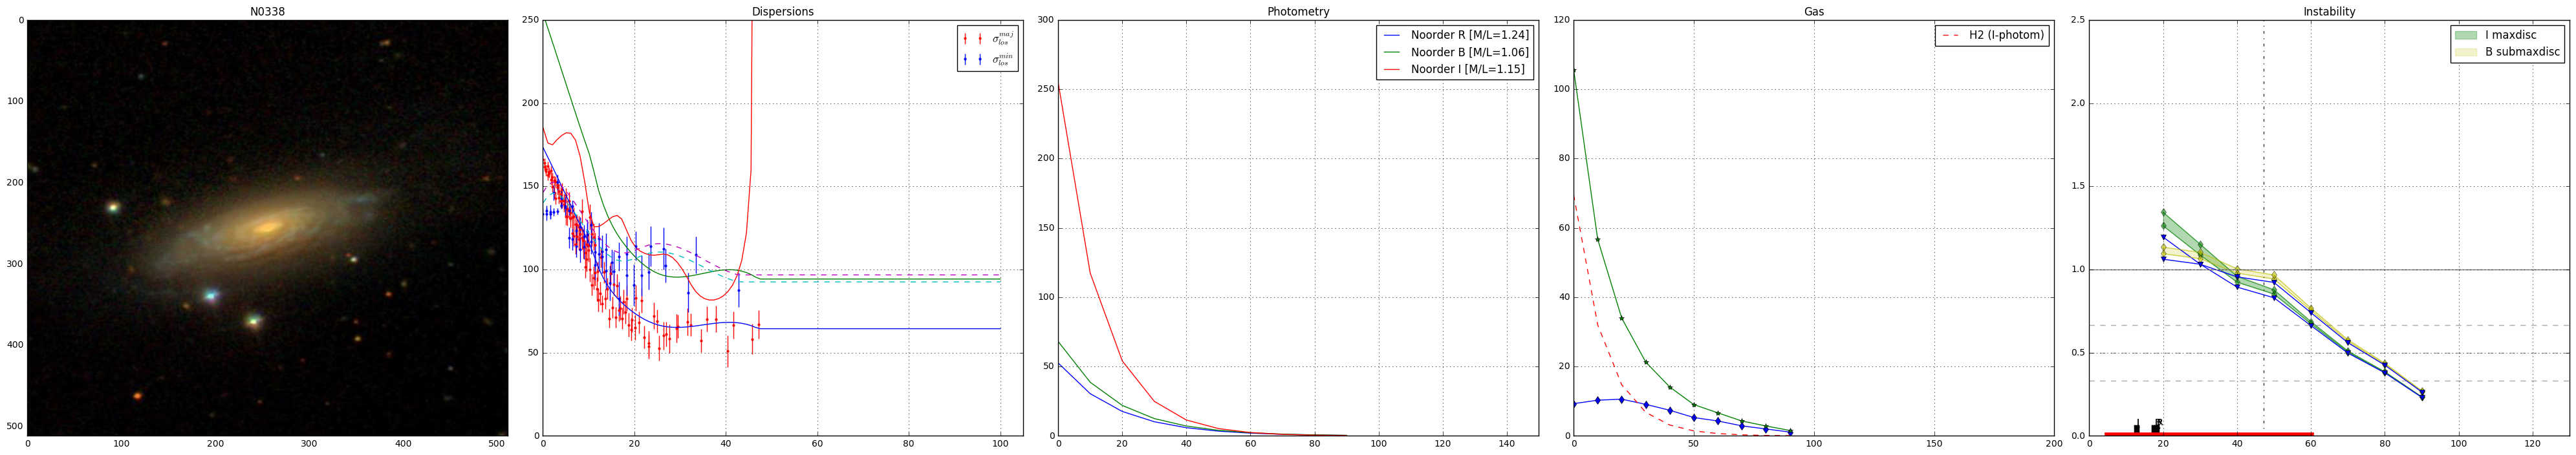

In [86]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc338_SDSS.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l, h_disc_I) for l in r_g_dens], '--', label='H2 (I-photom)')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_I) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Ic, h=h_disc_I), 6.23, 'I'), 
                  data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='I maxdisc')
    
    plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_B) + l[1]) for l in zip(r_g_dens, gas_dens)])[2:], 
                  epicycl=epicyclicFreq_real_, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
                  star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), 6.99, 'B'), 
                  data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='B submaxdisc')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)